In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import h5py
import imageio
import scipy
from sklearn.datasets import fetch_openml

---
## **Q.1)**

In [ ]:
#given data

X = [8,14,3,13,9,6,4,3,15,7,2,1,19,8,4,5,18,11]
X = np.array(X).reshape(6,3)

In [ ]:
#standardizing the dataset
X_std = StandardScaler().fit_transform(X)

#covariance matrix
m1 = np.mean(X_std[:,0])
m2 = np.mean(X_std[:,1])
m3 = np.mean(X_std[:,2])
x2 = np.copy(X_std)
x2[:,0] = x2[:,0]-m1
x2[:,1] = x2[:,1]-m2
x2[:,2] = x2[:,2]-m3
cov_mat = np.matmul(x2.T, x2)/(X_std.shape[0]-1)
cov_mat

array([[ 1.2       , -0.04772727, -0.58277152],
       [-0.04772727,  1.2       ,  0.09470037],
       [-0.58277152,  0.09470037,  1.2       ]])

In [ ]:
#eigen values and eigen vectors

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen Vectors:\n', eig_vecs)
print('Eigen Values:\n', eig_vals)

Eigen Vectors:
 [[-0.69401025  0.70241371 -0.15800237]
 [ 0.16586365 -0.05756869 -0.98446691]
 [ 0.70059904  0.70943698  0.07655164]]
Eigen Values:
 [1.79971072 0.61531314 1.18497614]


In [ ]:
eigen = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eigen.sort(key=lambda x: x[0], reverse=True)
print('Descending order:\n')
for i in eigen:
  print(i)

Descending order:

(1.799710719258176, array([-0.69401025,  0.16586365,  0.70059904]))
(1.1849761420590277, array([-0.15800237, -0.98446691,  0.07655164]))
(0.6153131386827971, array([ 0.70241371, -0.05756869,  0.70943698]))


In [ ]:
#taking first eigen vector as basis
base = eigen[0][1].reshape(3,1)
new_mat = np.matmul(X_std, base).reshape(6,1)
print('Modified matrix:\n', new_mat)

Modified matrix:
 [[-0.20423593]
 [-0.58697404]
 [ 1.74081123]
 [-0.71095189]
 [-1.70802694]
 [ 1.46937756]]


In [ ]:
#Comparing with sklearn library 
pca = PCA(n_components = 1)
p_comp = pca.fit_transform(X_std)
p_comp

array([[-0.20423593],
       [-0.58697404],
       [ 1.74081123],
       [-0.71095189],
       [-1.70802694],
       [ 1.46937756]])

---
## **Q.2)**

In [ ]:
#PCA on file P_1.txt

data = pd.read_csv('P_1.txt', sep=" ", header=None)
x1 = np.array(data[0])
x2 = np.array(data[1])
x3 = np.array(data[2])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x = np.c_[x1,x2,x3]

pca = PCA(n_components = 2)
p_comp = pca.fit_transform(x)
p_comp

array([[-0.69568668,  1.76026713],
       [-0.76720418,  1.6125334 ],
       [-0.9130088 ,  1.17777531],
       ...,
       [ 2.23094071,  0.14928142],
       [ 2.23831525,  0.04126771],
       [ 2.15556302,  0.09494229]])

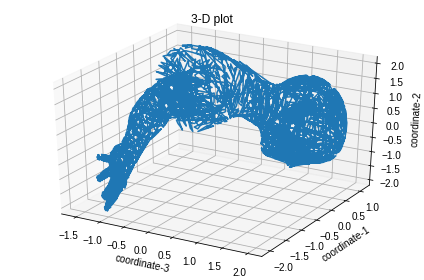

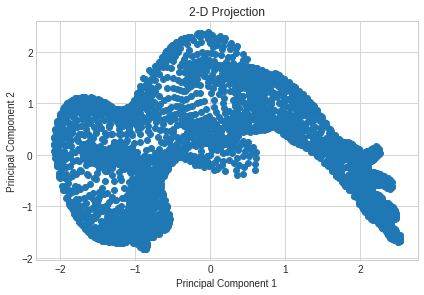

In [ ]:
#taking plots for visualization

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot(x3,x1,x2)
ax.set_xlabel('coordinate-3')
ax.set_ylabel('coordinate-1')
ax.set_zlabel('coordinate-2')
plt.title('3-D plot')
fig.tight_layout()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(p_comp[:,0], p_comp[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.title('2-D Projection')
    plt.show()

In [ ]:
#PCA on file P_2.txt

data = pd.read_csv('P_2.txt', sep=" ", header=None)
x1 = np.array(data[0])
x2 = np.array(data[1])
x3 = np.array(data[2])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x = np.c_[x1,x2,x3]

pca = PCA(n_components = 2)
p_comp = pca.fit_transform(x)
p_comp

array([[ 0.21288078,  1.18185227],
       [ 0.36140114,  1.01208883],
       [ 0.48206835,  0.80762276],
       ...,
       [-0.91914156,  0.09442811],
       [-1.03136633,  0.38360415],
       [-0.9856207 ,  0.32758092]])

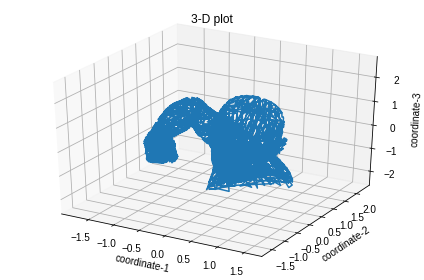

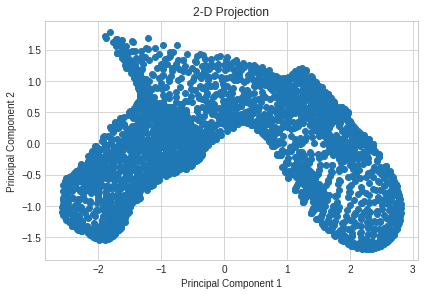

In [ ]:
#taking plots for visualization

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot(x1,x2,x3)
ax.set_xlabel('coordinate-1')
ax.set_ylabel('coordinate-2')
ax.set_zlabel('coordinate-3')
plt.title('3-D plot')
fig.tight_layout()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(p_comp[:,0], p_comp[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.title('2-D Projection')
    plt.show()

In [ ]:
#PCA on file P_3.txt

data = pd.read_csv('P_3.txt', sep=" ", header=None)
x1 = np.array(data[0])
x2 = np.array(data[1])
x3 = np.array(data[2])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x = np.c_[x1,x2,x3]

pca = PCA(n_components = 2)
p_comp = pca.fit_transform(x)
p_comp

array([[-0.35276327,  2.23338902],
       [-0.55823266,  2.10499246],
       [-0.48403347,  2.02450787],
       ...,
       [ 0.84312352, -1.15661533],
       [ 0.71488587, -1.2489697 ],
       [ 0.07386625, -1.18507481]])

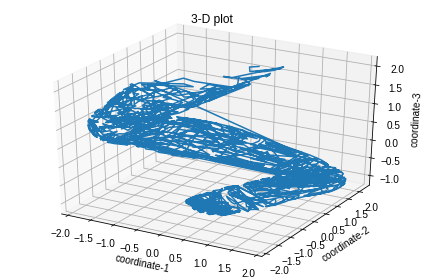

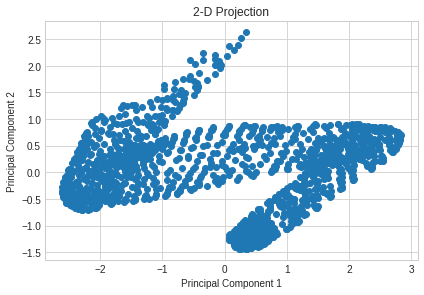

In [ ]:
#taking plots for visualization

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot(x1,x2,x3)
ax.set_xlabel('coordinate-1')
ax.set_ylabel('coordinate-2')
ax.set_zlabel('coordinate-3')
plt.title('3-D plot')
fig.tight_layout()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(p_comp[:,0], p_comp[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.title('2-D Projection')
    plt.show()

In [ ]:
#PCA on file P_4.txt

data = pd.read_csv('P_4.txt', sep=" ", header=None)
x1 = np.array(data[0])
x2 = np.array(data[1])
x3 = np.array(data[2])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x = np.c_[x1,x2,x3]

pca = PCA(n_components = 2)
p_comp = pca.fit_transform(x)
p_comp

array([[ 0.74514077,  1.75592699],
       [ 0.43036734,  1.72703995],
       [ 0.66500992,  1.75437193],
       ...,
       [-0.98265465, -0.95144415],
       [-1.84829903, -0.28547677],
       [-1.84411746, -0.32116864]])

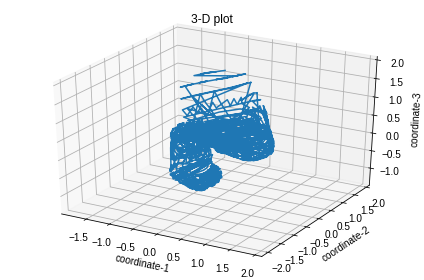

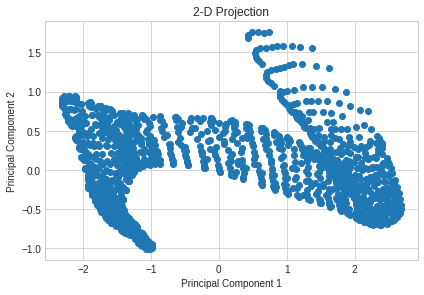

In [ ]:
#taking plots for visualization

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot(x1,x2,x3)
ax.set_xlabel('coordinate-1')
ax.set_ylabel('coordinate-2')
ax.set_zlabel('coordinate-3')
plt.title('3-D plot')
fig.tight_layout()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(p_comp[:,0], p_comp[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.title('2-D Projection')
    plt.show()

In [ ]:
#PCA on file P_5.txt

data = pd.read_csv('P_5.txt', sep=" ", header=None)
x1 = np.array(data[0])
x2 = np.array(data[1])
x3 = np.array(data[2])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
x3 = (x3-np.mean(x3))/np.std(x3)

x = np.c_[x1,x2,x3]

pca = PCA(n_components = 2)
p_comp = pca.fit_transform(x)
p_comp

array([[1.16522302, 1.68568997],
       [1.29610467, 1.67970225],
       [0.79999716, 0.85439563],
       ...,
       [2.52870671, 2.57168557],
       [2.42728518, 2.50811645],
       [2.62930921, 2.54917274]])

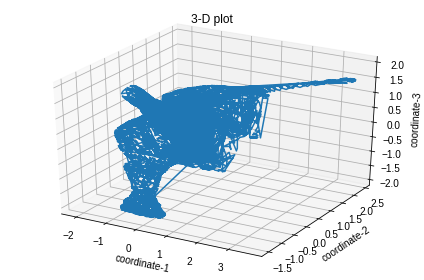

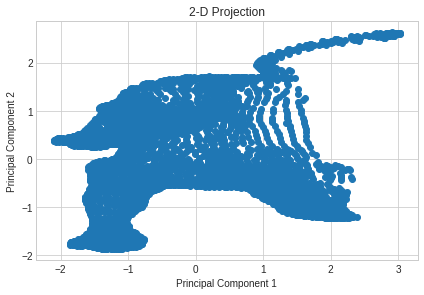

In [ ]:
#taking plots for visualization

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot(x1,x2,x3)
ax.set_xlabel('coordinate-1')
ax.set_ylabel('coordinate-2')
ax.set_zlabel('coordinate-3')
plt.title('3-D plot')
fig.tight_layout()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(p_comp[:,0], p_comp[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.title('2-D Projection')
    plt.show()

---
## **Q.3)**

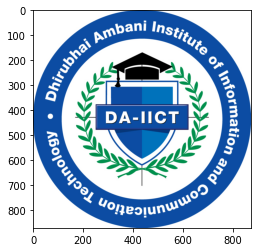

In [ ]:
#getting image from the given url
import requests
from io import BytesIO

url = 'http://intranet.daiict.ac.in/~daiict_nt01/Announcement/LOGO/DA-IICT-Emblem-Final%20Colour.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

In [ ]:
print(img.size)
print(img.mode)
np_img = np.array(img)
print(np_img.shape)

(870, 870)
RGB
(870, 870, 3)


In [ ]:
#extracting r,g,b components
a_r = np_img[:,:,0]
a_g = np_img[:,:,1]
a_b = np_img[:,:,2]

In [ ]:
#since its just sigle image, applying pca to reduce the number of columns in the image data
def pca_on_single_img(a_r, a_g, a_b, n):
  pca = PCA(n_components= n)
  f  = pca.fit_transform(a_r)
  rec_r = pca.inverse_transform(f).reshape(870,870)

  pca = PCA(n_components= n)
  f  = pca.fit_transform(a_g)
  rec_g = pca.inverse_transform(f).reshape(870,870)

  pca = PCA(n_components= n)
  f  = pca.fit_transform(a_b)
  rec_b = pca.inverse_transform(f).reshape(870,870)

  recovered_img = np.copy(np_img)
  recovered_img[:,:,0] = rec_r
  recovered_img[:,:,1] = rec_g
  recovered_img[:,:,2] = rec_b

  plt.imshow(recovered_img)
  plt.title('no_of_comp = %d'%n)
  plt.show()

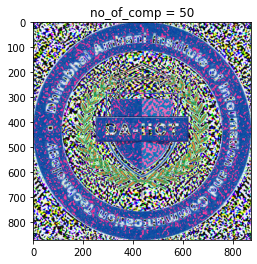

In [ ]:
#no_of_components = 50
pca_on_single_img(a_r, a_g, a_b, 50)

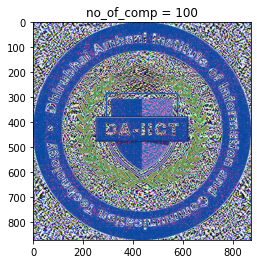

In [ ]:
pca_on_single_img(a_r, a_g, a_b, 100)

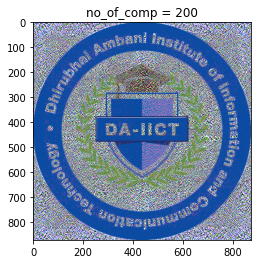

In [ ]:
pca_on_single_img(a_r, a_g, a_b, 200)

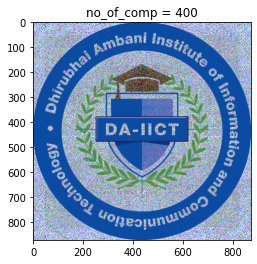

In [ ]:
pca_on_single_img(a_r, a_g, a_b, 400)

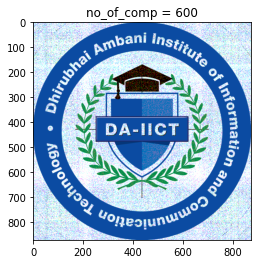

In [ ]:
pca_on_single_img(a_r, a_g, a_b, 600)

---
## **Q.4)**

In [ ]:
#reading faceimages.mat file

file = h5py.File(r'faceimages.mat')
data = file.get('data')
x = np.array(data)
x = x[0:10304,:]
print(x.shape)

(10304, 400)


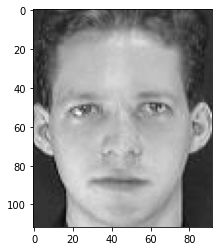

In [ ]:
#printing first face-image
real = x[:,0].reshape(92,112)
plt.imshow(real.T,cmap = 'gray')
plt.show()

In [ ]:
#creating mean-centered data
mean = np.zeros(10304)
mean = np.mean(x,axis=1)
for i in range(10304):
    x[i] = x[i]-mean[i]

In [ ]:
#co-variance matrix
cov = np.cov(x)
print(cov.shape)
print('covariance matrix is:\n',cov)

(10304, 10304)
covariance matrix is:
 [[1279.32656015 1268.83255639 1259.75737469 ...   21.6276817
    -2.07218045  -58.63463033]
 [1268.83255639 1264.08210526 1257.36784461 ...   18.08466165
    -5.59197995  -62.75155388]
 [1259.75737469 1257.36784461 1255.29693609 ...   18.8168797
    -4.37694236  -59.17181078]
 ...
 [  21.6276817    18.08466165   18.8168797  ... 1704.12428571
  1668.79298246 1615.49001253]
 [  -2.07218045   -5.59197995   -4.37694236 ... 1668.79298246
  1777.20802005 1780.6726817 ]
 [ -58.63463033  -62.75155388  -59.17181078 ... 1615.49001253
  1780.6726817  1939.41698622]]


In [ ]:
#getting eigen-vectors and eigen-values and sorting them correspondigly

eig_vals, eig_vecs = scipy.linalg.eigh(cov)
print('Eigen Vectors:\n', eig_vecs)
print('Eigen Values:\n', eig_vals)

eigen = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eigen.sort(key=lambda x: x[0], reverse=True)

Eigen Vectors:
 [[ 1.09921431e-02  1.72683267e-02 -3.71574237e-02 ... -1.99221269e-02
  -1.46234340e-02  2.16540447e-03]
 [ 2.86179818e-01  2.04404056e-01  5.82890898e-01 ... -1.98194696e-02
  -1.45967027e-02  2.06455802e-03]
 [-8.22694658e-02 -4.70242349e-01  9.52678486e-02 ... -1.97707151e-02
  -1.45742421e-02  2.02715357e-03]
 ...
 [ 1.79349721e-02 -3.11459560e-04  5.26807780e-03 ... -1.60756344e-02
   7.07647138e-03  6.12757175e-03]
 [-1.51790926e-02 -6.95845495e-04  8.21990534e-03 ... -1.60106270e-02
   7.71548293e-03  6.98050247e-03]
 [ 1.05386573e-02 -6.27031785e-03 -9.45183234e-04 ... -1.48817774e-02
   8.90895920e-03  7.28133220e-03]]
Eigen Values:
 [-1.67855214e-09 -1.49476807e-09 -1.38451198e-09 ...  1.09741090e+06
  2.07070497e+06  2.82472210e+06]


In [ ]:
e2 = eigen.copy()

In [ ]:
#generating projection matrix
A = np.zeros((10304,10304))
for i in range(len(e2)):
  A[:,i] = e2[i][1]
A

array([[ 2.16540447e-03, -1.46234340e-02, -1.99221269e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.06455802e-03, -1.45967027e-02, -1.98194696e-02, ...,
        -1.13333697e-04,  1.08152242e-04,  6.57565319e-05],
       [ 2.02715357e-03, -1.45742421e-02, -1.97707151e-02, ...,
        -1.47701204e-04,  1.14280610e-04, -1.06547967e-04],
       ...,
       [ 6.12757175e-03,  7.07647138e-03, -1.60756344e-02, ...,
        -1.26432200e-02,  1.34955885e-02, -2.30018193e-03],
       [ 6.98050247e-03,  7.71548293e-03, -1.60106270e-02, ...,
         4.17616600e-03,  1.14045145e-02, -5.17516959e-03],
       [ 7.28133220e-03,  8.90895920e-03, -1.48817774e-02, ...,
         2.33701683e-04,  4.39556556e-03,  9.75348479e-03]])

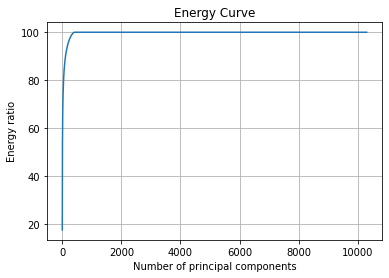

In [ ]:
# energy curve
tot = sum(eig_vals)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

# cumulative sum of variance
cum_var_exp = np.cumsum(var_exp) 

plt.plot(cum_var_exp)
plt.xlabel('Number of principal components')
plt.ylabel('Energy ratio')
plt.title('Energy Curve')
plt.grid()
plt.show()

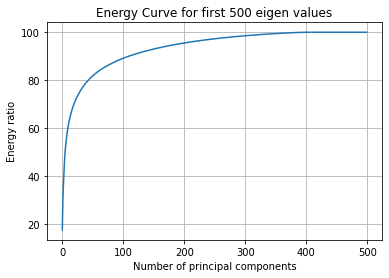

In [ ]:
#energy curve for first 500 eigen values
plt.plot(cum_var_exp[:500])
plt.xlabel('Number of principal components')
plt.ylabel('Energy ratio')
plt.title('Energy Curve for first 500 eigen values')
plt.grid()
plt.show()

In [ ]:
#transforming x in the form of dimension no_of_images*no_of_features
org_x = np.copy(x).T
org_x.shape

(400, 10304)

In [ ]:
#Feature matrix * top k eigenvectors = Transformed Data
def face_img_recon(n):
  recv_x = np.matmul(org_x, A[:,:n])
  print(recv_x.shape)
  print(recv_x[0,:].shape)
  recov_x = np.matmul(recv_x, A[:,:n].T)
  recovered = recov_x[0,:].reshape(92,112)
  error = np.linalg.norm(org_x - recov_x)
  error_pr = (error * 100)/(np.linalg.norm(org_x))
  print('Reconstruction error:',error_pr,'%')
  plt.imshow(recovered.T,cmap='gray')
  plt.title('no_of_principal_components:%d'%n)
  plt.show()

(400, 5)
(5,)
Reconstruction error: 72.07459337213095 %


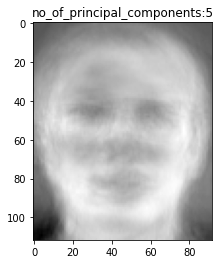

In [ ]:
#no_of_principal_components = 5
face_img_recon(5)

(400, 10)
(10,)
Reconstruction error: 63.27778188042152 %


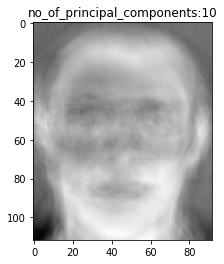

In [ ]:
face_img_recon(10)

(400, 50)
(50,)
Reconstruction error: 42.87078818234058 %


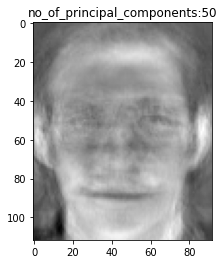

In [ ]:
face_img_recon(50)

(400, 100)
(100,)
Reconstruction error: 33.044950757099734 %


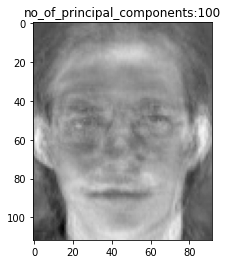

In [ ]:
face_img_recon(100)

(400, 500)
(500,)
Reconstruction error: 2.1641495931904117e-12 %


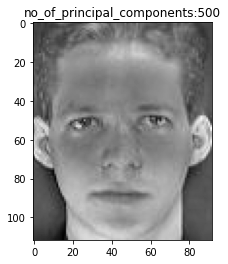

In [ ]:
face_img_recon(500)

---
## **Q.5)**

In [ ]:
#fetching MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X = np.array(X)
y = np.array(y)
y = y.astype(int)

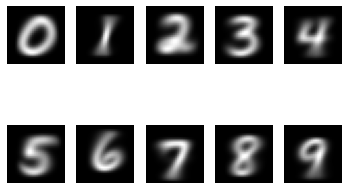

In [ ]:
#plotting mean images
mean_img = np.zeros((10,784))
for i in range(10):
  temp = []
  for j in range(len(y)):
    if y[j]==i:
      temp.append(X[j])
  temp = np.array(temp).reshape((len(temp),784))
  for j in range(784):
    mean_img[i][j] = np.mean(temp[:,j])
  plt.subplot(2,5,i+1)
  plt.imshow(mean_img[i].reshape((28,28)),cmap = 'gray')
  plt.axis('off')

In [ ]:
X_std = StandardScaler().fit_transform(X)
cov_mat = np.cov(X_std.T)
cov_mat.shape

(784, 784)

In [ ]:
#getting eigen-vectors and eigen-values and sorting them correspondigly

eig_vals, eig_vecs = scipy.linalg.eigh(cov_mat)

eigen = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eigen.sort(key=lambda x: x[0], reverse=True)

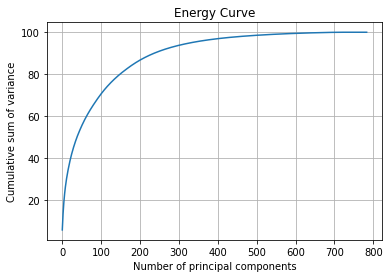

In [ ]:
# energy curve
total = sum(eig_vals)

var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]

# cumulative sum of variance
cum_var_exp = np.cumsum(var_exp) 

plt.plot(cum_var_exp)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative sum of variance')
plt.title('Energy Curve')
plt.grid()
plt.show()

In [ ]:
#85% variance
for i in range(len(cum_var_exp)):
  if cum_var_exp[i] > 85.0:
    break
print('Minimum number of components for 85% variance is:',i)

Minimum number of components for 85% variance is: 185


In [ ]:
#generating projection matrix
A = np.zeros((784,784))
for i in range(len(eigen)):
  A[:,i] = eigen[i][1]
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Feature matrix * top k eigenvectors = Transformed Data
def mnist_recon(org_x, n):
  recv_x = np.matmul(org_x, A[:,:n])
  print(recv_x.shape)
  print(recv_x[0,:].shape)
  recov_x = np.matmul(recv_x, A[:,:n].T)
  return recov_x

In [ ]:
#plotting mean images
def plot_mean_img(X, y):
  mean_img = np.zeros((10,784))
  for i in range(10):
    temp = []
    for j in range(len(y)):
      if y[j]==i:
        temp.append(X[j])
    temp = np.array(temp).reshape((len(temp),784))
    for j in range(784):
      mean_img[i][j] = np.mean(temp[:,j])
    plt.subplot(2,5,i+1)
    plt.imshow(mean_img[i].reshape((28,28)),cmap = 'gray')
    plt.axis('off')

(70000, 10)
(10,)


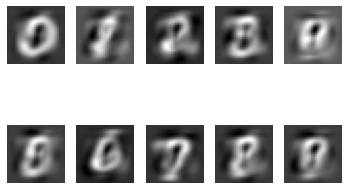

In [ ]:
#number of components = 10
rec = mnist_recon(X,10)
plot_mean_img(rec, y)

(70000, 50)
(50,)


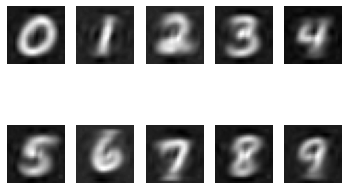

In [ ]:
rec = mnist_recon(X,50)
plot_mean_img(rec, y)

(70000, 100)
(100,)


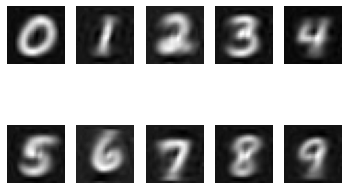

In [ ]:
rec = mnist_recon(X,100)
plot_mean_img(rec, y)

(70000, 185)
(185,)


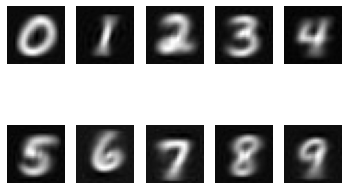

In [ ]:
rec = mnist_recon(X,185)
plot_mean_img(rec, y)